# Funciones de Activación:
Nos permiten obtener valores acotados para evitar problemas de escalado, y quitarle la linealidad inherente al modelo neuronal. Podemos encontrar muchas, pero siempre deberemos elegir la más adecuada en cada caso. Un requisito indispensable para estas funciones es la eficiencia, ya que funciones muy sofisticadas comprometerán los recursos asignados al modelo.

In [ ]:
# Ejemplos
import numpy as np
def sigmoid(a, derivate = False):
    if derivate:
        return np.exp(-a)/(( np.exp(-a) +1)**2)
    else:    
        return 1 / (1 + np.exp(-a))

def steep(x, derivate = False):    
    return np.piecewise(x,[x<0.0,x>=0.0],[0,1])

x = np.linspace(10,-10,100)

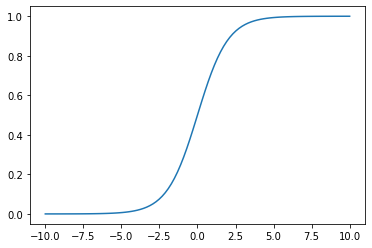

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,sigmoid(x))
plt.show()

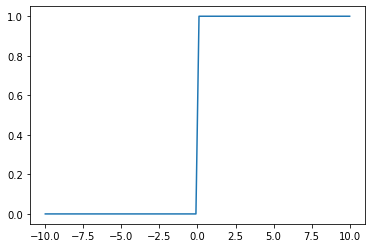

In [ ]:
plt.plot(x,steep(x))
plt.show()

## Otras funciones para investigar:
1. ReLU: Lineal (identidad) para valores positivos, y 0 para negativos. Muy usada en capas convolucionales.
2. Softmax: Normalización de los valores devueltos por todas las neuronas de la capa. Muy usada en las capas de salida.
Enlaces:
* https://lamaquinaoraculo.com/computacion/la-funcion-de-activacion/
* https://www.youtube.com/watch?v=_0wdproot34
* https://empresas.blogthinkbig.com/las-matematicas-del-machine-learning-funciones-de-activacion/

# Métricas de Performance:
* Precisión
* Recall
* F1
* ROC-AUC (https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_2_multi_class.ipynb)

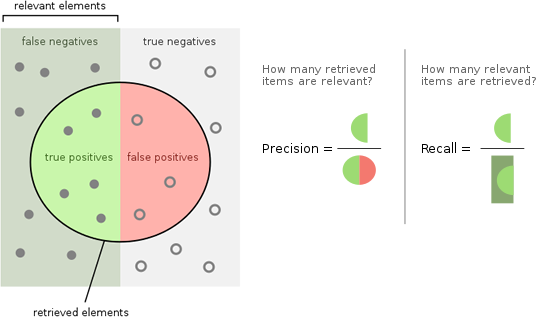

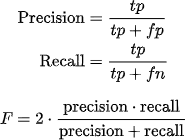

# Resolver un problema de clasificación con RNs:
## Reconocimiento de dígitos manuscritos
Utilizaremos un dataset de la literatura para entrenar y evaluar una red neuronal. 
Acá pueden leer acerca del dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

### Objetivo de un problema de Clasificación: Alta performance respecto a métricas de acierto en el reconocimiento de instancias



In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
type(digits)

sklearn.utils.Bunch

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
type(digits.images[:2])

numpy.ndarray

In [ ]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
# ¿Cuántos elementos contienen estos campos?
print("Elementos en digits.images = ", len(digits.images))
print("Elementos en digits.target = ", len(digits.target))

Elementos en digits.images =  1797
Elementos en digits.target =  1797


In [ ]:
#¿Cuál es el primer dígito del dataset?
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


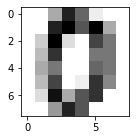

In [ ]:
#Podemos visualizar la matriz como una imagen
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

In [ ]:
datos = digits.images.reshape((len(digits.images), -1))
print(digits.images.shape)
print(datos.shape)
print(datos[0])

(1797, 8, 8)
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
#Normalizamos los datos
datos = datos/15.
print(max(datos[0]))
datos[0]

1.0


array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [ ]:
np.max(digits.images[0])

15.0

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(64,), 
                    max_iter=100, learning_rate_init=.1,verbose=True)

# Entrenamos la red con n datos
n = 898
mlp.fit(datos[:n], digits.target[:n])

Iteration 1, loss = 2.89591198
Iteration 2, loss = 0.98299782
Iteration 3, loss = 0.46159134
Iteration 4, loss = 0.25179465
Iteration 5, loss = 0.15671378
Iteration 6, loss = 0.10407936
Iteration 7, loss = 0.07788625
Iteration 8, loss = 0.06137467
Iteration 9, loss = 0.03817274
Iteration 10, loss = 0.01777435
Iteration 11, loss = 0.01568922
Iteration 12, loss = 0.01215450
Iteration 13, loss = 0.00813633
Iteration 14, loss = 0.00819560
Iteration 15, loss = 0.00569379
Iteration 16, loss = 0.00551192
Iteration 17, loss = 0.00512292
Iteration 18, loss = 0.00427819
Iteration 19, loss = 0.00422446
Iteration 20, loss = 0.00340481
Iteration 21, loss = 0.00331971
Iteration 22, loss = 0.00301735
Iteration 23, loss = 0.00291014
Iteration 24, loss = 0.00276188
Iteration 25, loss = 0.00264585
Iteration 26, loss = 0.00256354
Iteration 27, loss = 0.00245571
Iteration 28, loss = 0.00238739
Iteration 29, loss = 0.00226561
Iteration 30, loss = 0.00226709
Iteration 31, loss = 0.00210420
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(64,),
              learning_rate_init=0.1, max_iter=100, verbose=True)

In [ ]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Verificamos sus predicciones para los datos restantes
esperado = digits.target[n:]
prediccion = mlp.predict(datos[n:])

# Y mostramos los resultados.
from sklearn import metrics

matriz_conf=metrics.confusion_matrix(esperado, prediccion)
clasif_report=metrics.classification_report(esperado, prediccion)

print("Reporte del clasificador: \n %s\n %s\n" %(mlp, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)
#Macro AVG: Promedio normal de métricas F1 para cada clase
#Weighted AVG: Promedio ponderado de F1 por porcentaje de elementos de la clase
#https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

Reporte del clasificador: 
 MLPClassifier(activation='tanh', hidden_layer_sizes=(64,),
              learning_rate_init=0.1, max_iter=100, verbose=True)
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.94      0.88      0.91        91
           2       0.98      1.00      0.99        86
           3       0.98      0.88      0.92        91
           4       0.97      0.96      0.96        92
           5       0.90      0.96      0.93        91
           6       0.98      0.99      0.98        91
           7       0.94      0.94      0.94        89
           8       0.93      0.90      0.91        88
           9       0.84      0.95      0.89        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899


Matriz de confusión:
[[86  0  0  0  1  0  1  0  0  0]
 [ 0 80  0  1  0  1  0  1  0  8]

In [ ]:
ind = 250
esperado0 = digits.target[ind]
imagen0 = datos[ind]
#imagen = meterle ruido
prediccion0 = mlp.predict([imagen])
print(prediccion0)
print(esperado0)

[4]
4


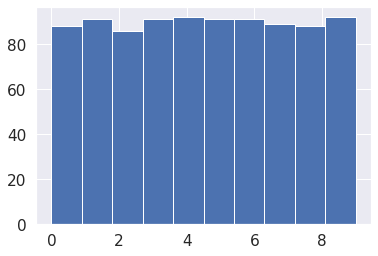

In [ ]:
#Verificar balance de clases
plt.hist(esperado)
plt.show()

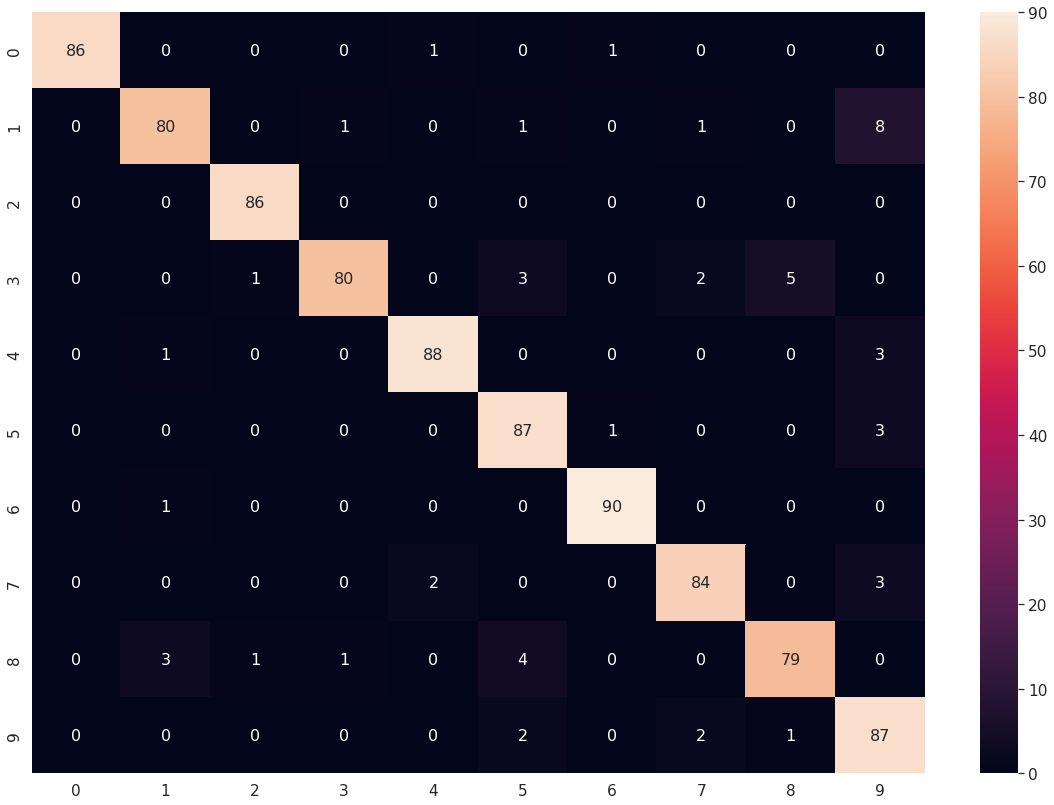

In [ ]:
###Visualización mejor de la matriz de confusión###
import seaborn as sn
#snn_cm = confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(y_test_predichos, axis=1))
#snn_df_cm = pd.DataFrame(snn_cm, range(100), range(100))  
#snn_df_cm = pd.DataFrame(snn_cm)
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(matriz_conf, annot=True, annot_kws={"size": 16}) # font size  
plt.show()

## Ejercicio 1: Localizar dos elementos para los cuales el modelo haya fallado, y verificar por qué puede haberse equivocado.

In [ ]:
#Pista: Buscar en los vectores de valores predichos y correctos valores diferentes
#Imprimir en pantalla las imágenes de los dígitos detectados (plt)




## Ejercicio 2: Probar otras arquitecturas de RN, usando diferentes funciones de activación, learning rates y otros parámetros

Presentar un gráfico con los diferentes resultados de desempeño y sus configuraciones

In [ ]:
#Instanciar nuevamente el MLP de ScikitLearn